In [34]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score

from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor

import time
from operator import itemgetter



In [39]:
path = 'credit.data'
data = pd.read_csv(path, delimiter='	',header=None, na_values='?')
##data = pd.DataFrame(data)
data = data.dropna(axis=0, how='any')
cible = data[15]##.values.reshape(-1,1)
###cible  = pd.DataFrame(data=cible)
cible = cible.replace(to_replace='+', value=1)
cible = cible.replace(to_replace='-', value=0)
data = data.drop(15, axis=1)
sous_ensemble = data[[1,2,7,13,14]]
sous_ensemble = sous_ensemble.astype(float)

gnb = GaussianNB()


X_train, X_test, y_train, y_test = train_test_split(sous_ensemble, 
                                                    cible, 
                                                    test_size=0.2, 
                                                    random_state=42)

# ROC

In [3]:
def TP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] > theta and x == 1:
            count += 1
        i += 1
    return count


def FP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] >= theta and x == 0:
            count += 1
        i += 1
    return count


def TN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 0:
            count += 1
        i += 1
    return count


def FN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 1:
            count += 1
        i += 1
    return count


class ROC_curves:
    def __init__(self,
                 pred=sous_ensemble,
                 res=cible,
                 gran = 101):
        x = []
        y = []
        for j in range(0,gran):
            tn = TN(j/(gran-1),pred,res)
            neg = tn + FP(j/(gran-1),pred,res)
            tp = TP(j/(gran-1),pred,res)
            pos = tp + FN(j/(gran-1),pred,res)

            if neg == 0:
                x.append(0)
            else:
                x.append(tn / neg)
            if pos == 0:
                y.append(0)
            else:
                y.append(tp / pos)
      
        self.rocx = x
        self.rocy = y
    def plot_it(self):
        plt.plot(self.rocx,self.rocy)
        plt.show()

# Qualité

In [4]:
class Qualite:
    def __init__(self, 
                   _modele=gnb, 
                   _data=sous_ensemble, 
                   _y=cible, 
                   _y_pred=cible,
                   _y_pred_proba=cible,
                   _cv=10,
                   _print_mode=True):
        
        self.accuracy = sklearn.metrics.accuracy_score(_y, _y_pred)
        self.AUC = sklearn.metrics.roc_auc_score(_y, _y_pred)
        self.cross_validation = cross_val_score(_modele, _data, y=_y, cv=_cv)
        self.moyenne = np.mean(self.cross_validation)
        self.ecart_type = np.std(self.cross_validation)
        self.precision = average_precision_score(_y, _y_pred)
        
        self.roc = ROC_curves(pred=_y_pred_proba, res=_y)
        
        
        if _print_mode:
            self.roc.plot_it()

# Apprentissage

In [5]:
def algo_apprentissage(mod=GaussianNB(),
                           data=sous_ensemble,
                           target=cible,
                           print_mode=True,
                           cv=10):
    X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=42)
    result = dict()
    mod_fit = mod.fit(X_train, y_train)
    y_prediction_proba = mod_fit.predict_proba(X_test)
    y_prediction = mod_fit.predict(X_test)
    q_mod = Qualite(_modele=mod,
                 _data=X_test,
                 _y=y_test,
                 _y_pred=y_prediction,
                 _y_pred_proba=y_prediction_proba,
                 _print_mode=print_mode,
                 _cv=cv)
    
    result['y_prediction_proba'] = y_prediction_proba
    result['y_prediction'] = y_prediction
    result['q_mod'] = q_mod
    
    if print_mode:
        print('La précision est ' + str(q_mod.accuracy))
        print('')
        print('L\'AUC est ' + str(q_mod.AUC))
        print('')
        print('Le score moyen par ' + str(cv) + ' cross-validation est ' + str(q_mod.moyenne))
    
    return result

# NaiveBayesSimple

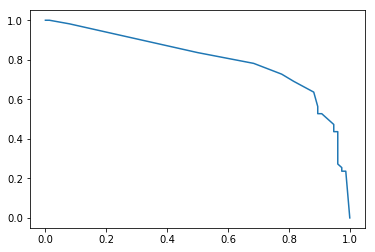

La précision est 0.740458015267

L'AUC est 0.700956937799

Le score moyen par 10 cross-validation est 0.745879120879


In [6]:
GNB = GaussianNB()
gnb = algo_apprentissage(GNB)

# Arbre CART

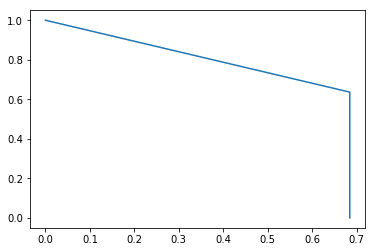

La précision est 0.664122137405

L'AUC est 0.66028708134

Le score moyen par 10 cross-validation est 0.786446886447


In [7]:
DTC = tree.DecisionTreeClassifier()
dtc = algo_apprentissage(DTC)

# Arbre ID3

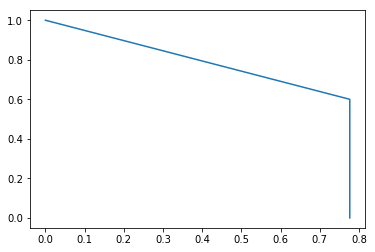

La précision est 0.702290076336

L'AUC est 0.688157894737

Le score moyen par 10 cross-validation est 0.748992673993


In [8]:
id3 = tree.DecisionTreeClassifier(criterion="entropy")
essai = algo_apprentissage(id3)

# Decision Stump

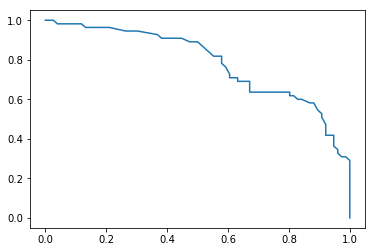

La précision est 0.732824427481

L'AUC est 0.716985645933

Le score moyen par 10 cross-validation est 0.767307692308


In [9]:
decision_stump = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=0)

ds = algo_apprentissage(decision_stump)

# MLP

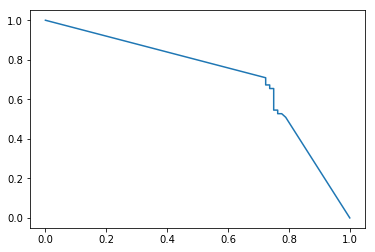

La précision est 0.709923664122

L'AUC est 0.702272727273

Le score moyen par 10 cross-validation est 0.725824175824


In [10]:
MLP = MLPClassifier(solver='lbfgs',
                    alpha=1,
                    hidden_layer_sizes=(20, 10))

mlp = algo_apprentissage(MLP)

# KNN

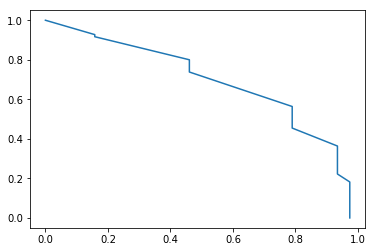

La précision est 0.69465648855

L'AUC est 0.676555023923

Le score moyen par 10 cross-validation est 0.770512820513


In [11]:
KNN = KNeighborsClassifier()
knn = algo_apprentissage(KNN)

# Bagging 

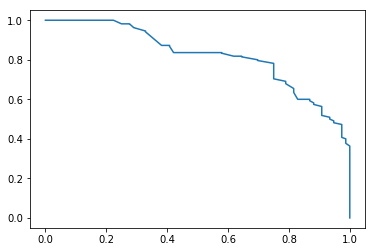

La précision est 0.740458015267

L'AUC est 0.721052631579

Le score moyen par 10 cross-validation est 0.797710622711


In [12]:
BC = BaggingClassifier(n_estimators=50)
bc = algo_apprentissage(BC)

# Adaboost

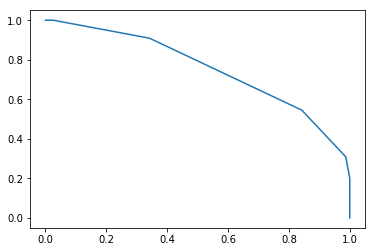

La précision est 0.717557251908

L'AUC est 0.693779904306

Le score moyen par 10 cross-validation est 0.697802197802


In [13]:
ABC = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1.0,
                         algorithm='SAMME.R',
                         random_state=None)
abc = algo_apprentissage(ABC)

# RandomForest

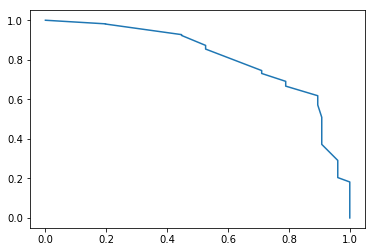

La précision est 0.778625954198

L'AUC est 0.756459330144

Le score moyen par 10 cross-validation est 0.774450549451


In [14]:
RFC = RandomForestClassifier(n_estimators=10,
                             criterion='gini',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features='auto',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             bootstrap=True,
                             oob_score=False,
                             n_jobs=1,
                             random_state=None,
                             verbose=0,
                             warm_start=False,
                             class_weight=None)

rfc = algo_apprentissage(RFC)

In [15]:
def pca_transform(data=sous_ensemble,
        target=cible,
        variance=0.7,
        print_mode=True,
        normalized=True,
        min_max_ed=False):
    if normalized:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    elif min_max_ed:
        scaler = MinMaxScaler()
        data = scaler.fit_transform(data)
        
        
    for x in range(len(data[0])):
        pca = PCA(n_components=x)
        pca.fit(data)
        if sum(pca.explained_variance_ratio_) > variance:## and x >1:
            if print_mode:
                print('Hello World')
            break
    X_pca = pca.fit_transform(data)
    if print_mode:
        plt.scatter(X_pca[:, 0], X_pca[:, 1])
        plt.show()
        plt.close()
    return [pca,X_pca]
        
        
pca_data = pca_transform(normalized=True, print_mode=False)[1]



In [25]:
colnames = ['Accuracy', 'AUC', 'Moyenne CV', 'Std CV', 'Temps']
algos = [KNN, DTC, id3, BC, RFC]
indexs = ['KNN', 'DTC', 'id3', 'BC', 'RFC']
clfs = dict()
for x in range(len(algos)):
    clfs[indexs[x]] = algos[x]
    
    
    
def final_table(mode=None,
                data=sous_ensemble,
                col=colnames,
                algos=algos,
                indexs=indexs):
    if mode is None:
        pass
    elif mode == 'normalized':
        scaler = StandardScaler()
        scaler.fit(data)
        data = scaler.transform(data)
    elif mode == 'min_max_ed':
        scaler = MinMaxScaler()
        scaler.fit(data)
        data = scaler.transform(data)
    elif mode == 'pca':
        data = pca_transform(data=data,
                                 normalized=True,
                                 print_mode=False)[1]


    result = []
    for alg in algos:
        t1 = time.time()
        res_algo = algo_apprentissage(alg, data=data, target=cible,print_mode=False)
        t2 = time.time()
        delta_t = t2 - t1
        ajout = [res_algo['q_mod'].accuracy, res_algo['q_mod'].AUC, res_algo['q_mod'].moyenne, res_algo['q_mod'].ecart_type, delta_t]
        result.append(ajout)

    result = pd.DataFrame(result, columns=colnames, index=indexs)
    return result

modes = [None, 'normalized', 'min_max_ed', 'pca']

tables = dict()
for mode in modes:
    event = dict()
    tables[str(mode)] = final_table(mode=mode)

In [28]:
def run_classifiers(classifiers=clfs,
                    X=sous_ensemble,
                    Y=cible,
                    print_mode=True,
                    n_splits=10,
                    mode=None):
    
    if mode is None:
        pass
    elif mode == 'normalized':
        scaler = StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)
    elif mode == 'min_max_ed':
        scaler = MinMaxScaler()
        scaler.fit(X)
        X == scaler.transform(X)
    elif mode == 'pca':
        X = pca_transform(data=X,
                          normalized=True,
                          print_mode=False)[1]

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0) 

    result = []
    
    for i in classifiers:
        clf = classifiers[i]
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        if print_mode:
            print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        result.append([i,np.mean(cv_acc)])
    
    result = sorted(result, key=itemgetter(1), reverse=True)
    return result


rc = run_classifiers(mode='min_max_ed', print_mode=True)

Accuracy for KNN is: 0.683 +/- 0.053
Accuracy for DTC is: 0.669 +/- 0.054
Accuracy for id3 is: 0.694 +/- 0.063
Accuracy for BC is: 0.715 +/- 0.043
Accuracy for RFC is: 0.717 +/- 0.039


In [27]:
tables['None']

,Accuracy,AUC,Moyenne CV,Std CV,Temps
KNN,0.694656,0.676555,0.770513,0.125371,0.078351
DTC,0.664122,0.657775,0.779304,0.060118,0.094675
id3,0.717557,0.703828,0.763828,0.083767,0.060549
BC,0.748092,0.737679,0.810806,0.100970,0.747249
RFC,0.763359,0.748325,0.766209,0.113068,0.190309


In [31]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(sous_ensemble, cible)
importances = forest.feature_importances_

In [40]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train).predict(X_test)


array([ 0.9,  0.9,  1. ,  0.7,  0.2,  0.3,  0.2,  1. ,  0.2,  0.1,  0.7,
        0. ,  0.1,  0.3,  0.1,  0.1,  0.8,  0.7,  0.8,  0.1,  0.9,  0.8,
        0.5,  0.7,  0.7,  1. ,  0.3,  0. ,  0.8,  0.5,  1. ,  0.6,  0.8,
        1. ,  0. ,  0.6,  0.9,  0.1,  0.1,  0.6,  0.2,  0.3,  0.1,  0. ,
        0.9,  0.6,  0.2,  0.3,  0.5,  0.9,  0.3,  0.6,  0.6,  0. ,  0.2,
        0.8,  0.7,  0.2,  0.1,  0.6,  0.3,  0.1,  0.2,  0.8,  0.5,  0.6,
        0. ,  0.2,  0.4,  0.4,  0.4,  0.7,  0.9,  0. ,  0. ,  0.3,  0.5,
        0.7,  1. ,  0.4,  1. ,  0.3,  0. ,  0.4,  0.2,  0.7,  0.5,  0.7,
        0. ,  0.5,  0.3,  0.3,  0.3,  0. ,  1. ,  0.1,  0.4,  0.1,  0. ,
        0.8,  0.4,  0.1,  0.4,  0.5,  0.1,  1. ,  0. ,  1. ,  0. ,  0.1,
        0.9,  0.7,  0. ,  0.9,  0.6,  0.3,  0.9,  0. ,  0.5,  0.3,  1. ,
        0.6,  0.4,  0.4,  0.2,  0.5,  0.4,  0. ,  0.1,  0.2,  0.3])